# Problem Set 1: Descriptive Analytics

* Authors: `Jangwon Park, [ADD YOUR NAME HERE]`
* Emails: `jangwon.park@epfl.ch, [ADD YOUR EMAIL HERE]`

## Problem Description

* A telecom company is interested in segmenting loyal customers in order to optimize customer retention effort.
* What defines a loyal customer? What would be the characteristics of a loyal customer?
* How do we quantify the value of a customer?

## Import Data

In [122]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

data = pd.read_csv('Telco-Customer-Churn.csv')

# Count
obs, nvar = data.shape
print('Number of observations: {x:}'.format(x=obs))
print('Number of variables: {x:}'.format(x=nvar))

# View table
data

C:\Users\Jangw\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Number of observations: 7043
Number of variables: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Missing Data & Variable Types

In [117]:
# Are there any missing data in any feature?
data.isnull().values.any()

False

In [119]:
# Describe variable types
n_nom = 0 # number of nominal variables
n_num = 0 # number of numeric variables
n_ord = 0 # number of ordinal variables
for i,j in enumerate(data.columns):
    if j == 'TotalCharges':
        n_num += 1
        continue
    if type(data[j][0]) == str:
        n_nom += 1
    elif len(set(data[j])) <= 2:
        n_nom += 1
    else:
        n_num += 1

print('Number of nominal variables: {n:}'.format(n=n_nom))
print('Number of ordinal variables: {n:}'.format(n=n_ord))
print('Number of numeric (continuous) variables: {n:}'.format(n=n_num))

Number of nominal variables: 18
Number of ordinal variables: 0
Number of numeric (continuous) variables: 3


## Descriptive Statistics

Text(0.5, 1.0, 'How many customers left last year?')

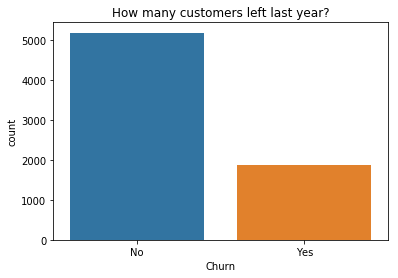

In [120]:
# How many customers canceled last year?
sb.countplot(data.Churn).set_title('How many customers left last year?')

Text(0.5, 1.0, 'Female and Male Customer Counts')

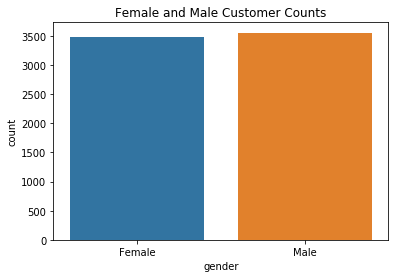

In [75]:
# Male to Female ratio
sb.countplot(data.gender).set_title('Female and Male Customer Counts')

Text(0.5, 1.0, 'Non-Senior (0) and Senior (1) Customer Counts')

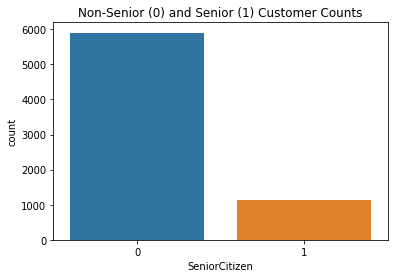

In [74]:
# Senior to non-senior ratio
sb.countplot(data.SeniorCitizen).set_title('Non-Senior (0) and Senior (1) Customer Counts')

## Contingency Tables

In [128]:
table1 = sm.stats.Table.from_data(data[['Churn', 'gender']])
table2 = sm.stats.Table.from_data(data[['Churn', 'SeniorCitizen']])
table3 = sm.stats.Table.from_data(data[['Churn', 'Partner']])
print(table1.table_orig, '\n')
print(table2.table_orig, '\n')
print(table3.table_orig, '\n')

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930 

SeniorCitizen     0    1
Churn                   
No             4508  666
Yes            1393  476 

Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669 

